In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
path = "/Users/younghyunkim/Desktop/dataproject/my_closet/raw_data"

In [3]:
df = pd.read_csv(f"{path}/closet_data_v2.csv")
df.head()

,제품명,계절,구매 년도,카테고리,구매처,브랜드여부,구매 전 착용 여부,색상,가격,유행 여부,구매 목적,최근 1년 내 착용 여부,착용 빈도,만족도,주변 평가,성공점수
0,배색 가디건 네이비,봄가을,2021,상의,온라인,보세,1,네이비,3,무난,일상,1,5,5,3,4.333333
1,배색 가디건 하늘,봄가을,2021,상의,오프라인,보세,1,스카이블루,3,무난,일상,1,3,4,4,3.666667
2,줄무늬 티셔츠,봄가을,2014,상의,오프라인,보세,0,네이비,1,무난,일상,1,4,5,4,4.333333
3,파란색 크롭 셔츠,봄가을,2023,상의,온라인,SPA,0,스카이블루,4,유행,일상,1,4,4,4,4.000000
4,숏 트렌치 코트,봄가을,2023,겉옷,오프라인,브랜드,1,베이지,16,유행,일상,1,3,4,3,3.333333


In [4]:
df.shape

(150, 16)

In [5]:
df.describe()

,구매 년도,구매 전 착용 여부,가격,최근 1년 내 착용 여부,착용 빈도,만족도,주변 평가,성공점수
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2020.786667,0.426667,4.980000,0.700000,2.646667,3.500000,3.506667,3.217778
std,1.770704,0.496250,3.551103,0.459793,1.351791,1.133682,0.917735,0.947532
min,2014.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,2020.000000,0.000000,3.000000,0.000000,1.000000,3.000000,3.000000,2.666667
50%,2021.000000,0.000000,4.000000,1.000000,3.000000,3.000000,3.000000,3.333333
75%,2022.000000,1.000000,5.000000,1.000000,4.000000,4.000000,4.000000,4.000000
max,2023.000000,1.000000,20.000000,1.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
df.describe(include="object")

,제품명,계절,카테고리,구매처,브랜드여부,색상,유행 여부,구매 목적
count,150,150,150,150,150,150,150,150
unique,150,3,4,2,3,18,3,7
top,배색 가디건 네이비,봄가을,상의,오프라인,보세,블랙,무난,일상
freq,1,64,83,115,81,30,113,80


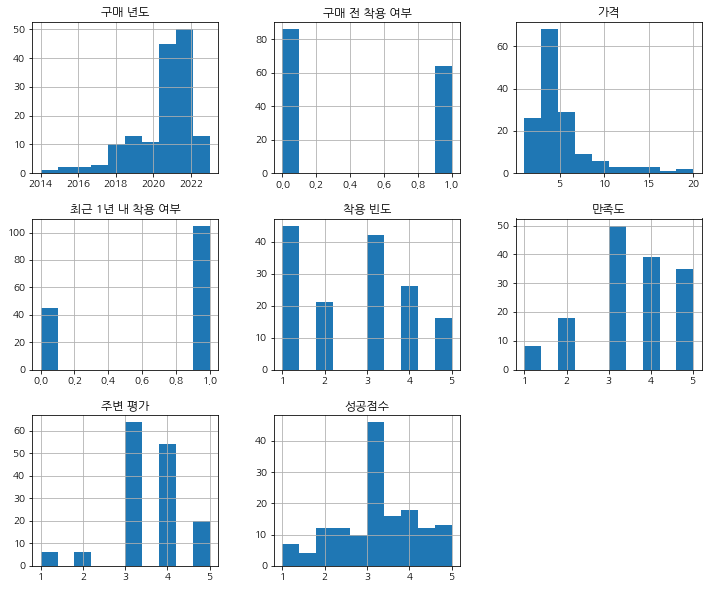

In [7]:
df.hist(bins=10, figsize=(12,10));

In [8]:
df["색상"].unique()

array(['네이비', '스카이블루', '베이지', '데님', '아이보리', '차콜', '블랙', '그레이', '퍼플',
       '화이트', '브라운', '그린', '핑크', '블루', '옐로우', '민트', '레드', '카키'],
      dtype=object)

In [9]:
df.nunique()

제품명              150
계절                 3
구매 년도             10
카테고리               4
구매처                2
브랜드여부              3
구매 전 착용 여부         2
색상                18
가격                18
유행 여부              3
구매 목적              7
최근 1년 내 착용 여부      2
착용 빈도              5
만족도                5
주변 평가              5
성공점수              13
dtype: int64

<AxesSubplot:xlabel='색상', ylabel='count'>

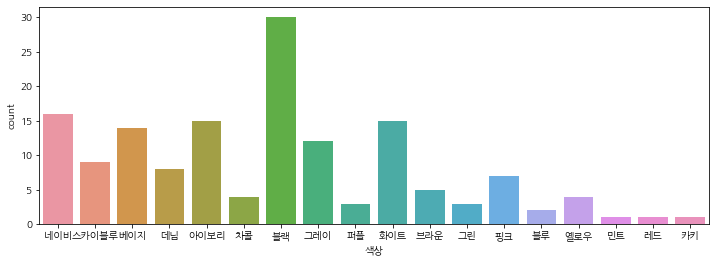

In [10]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x="색상")

# 데이터 전처리
- 색상 그룹화, 라벨인코딩

In [11]:
# 컬러 분류 리스트
blue =  ['스카이블루', '데님', '블루', '네이비']
white = ['아이보리', '화이트']
brown =  ['베이지', '브라운']
grey = ['차콜', '그레이']
black = ['블랙']
green = ['옐로우', '민트', '그린', '카키'] 
pink = ['핑크', '레드', '퍼플']

In [12]:
# 색상그룹 파생변수 생성
df.loc[df['색상'].isin(blue), '색상그룹'] = '블루 계열'
df.loc[df['색상'].isin(white), '색상그룹'] = '화이트 계열'
df.loc[df['색상'].isin(brown), '색상그룹'] = '브라운 계열'
df.loc[df['색상'].isin(grey), '색상그룹'] = '그레이 계열'
df.loc[df['색상'].isin(black), '색상그룹'] = '블랙 계열'
df.loc[df['색상'].isin(green), '색상그룹'] = '그린 계열'
df.loc[df['색상'].isin(pink), '색상그룹'] = '핑크 계열'

df.head()

,제품명,계절,구매 년도,카테고리,구매처,브랜드여부,구매 전 착용 여부,색상,가격,유행 여부,구매 목적,최근 1년 내 착용 여부,착용 빈도,만족도,주변 평가,성공점수,색상그룹
0,배색 가디건 네이비,봄가을,2021,상의,온라인,보세,1,네이비,3,무난,일상,1,5,5,3,4.333333,블루 계열
1,배색 가디건 하늘,봄가을,2021,상의,오프라인,보세,1,스카이블루,3,무난,일상,1,3,4,4,3.666667,블루 계열
2,줄무늬 티셔츠,봄가을,2014,상의,오프라인,보세,0,네이비,1,무난,일상,1,4,5,4,4.333333,블루 계열
3,파란색 크롭 셔츠,봄가을,2023,상의,온라인,SPA,0,스카이블루,4,유행,일상,1,4,4,4,4.000000,블루 계열
4,숏 트렌치 코트,봄가을,2023,겉옷,오프라인,브랜드,1,베이지,16,유행,일상,1,3,4,3,3.333333,브라운 계열


<AxesSubplot:xlabel='색상그룹', ylabel='count'>

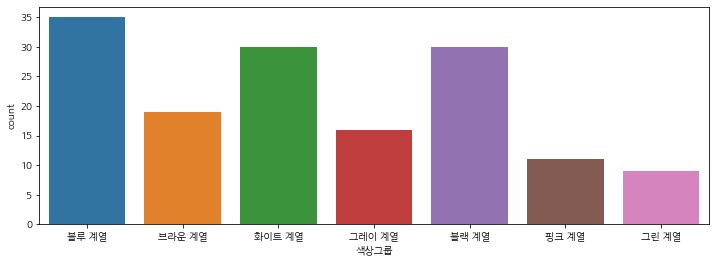

In [13]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x="색상그룹")

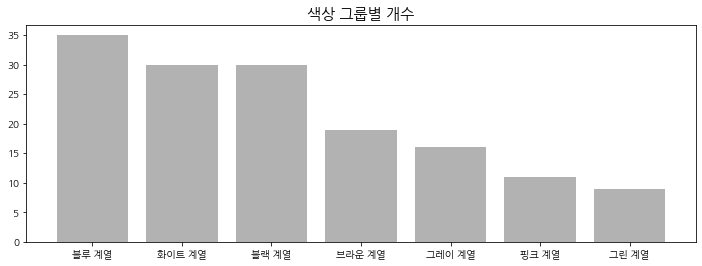

In [14]:
plt.figure(figsize=(12,4))
bar_df = df["색상그룹"].value_counts().reset_index()
plt.title("색상 그룹별 개수", fontsize=15)
plt.bar(bar_df["index"], bar_df["색상그룹"], color='k', alpha=.3)
plt.show()

In [15]:
#라벨 인코딩 # 계절, 카테고리, 색상그룹, 구매처, 브랜드 여부, 유행여부, 구매목적

In [16]:
df.columns

Index(['제품명', '계절', '구매 년도', '카테고리', '구매처', '브랜드여부', '구매 전 착용 여부', '색상', '가격',
       '유행 여부', '구매 목적', '최근 1년 내 착용 여부', '착용 빈도', '만족도', '주변 평가', '성공점수',
       '색상그룹'],
      dtype='object')

In [17]:
# 계절, 카테고리, 색상그룹, 구매처, 브랜드 여부, 유행여부, 구매목적 
df_label = df[['계절', '카테고리', '구매처', '브랜드여부', '유행 여부', '구매 목적','색상그룹']]
labels = df_label.columns
labels

Index(['계절', '카테고리', '구매처', '브랜드여부', '유행 여부', '구매 목적', '색상그룹'], dtype='object')

In [18]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
la

LabelEncoder()

In [19]:
label_encoded = df_label.copy()
for col in labels:
    la.fit(df_label[col])
    label_encoded[col] = la.transform(df_label[col])
    print(la.classes_)
label_encoded

['겨울' '봄가을' '여름']
['겉옷' '상의' '원피스' '하의']
['오프라인' '온라인']
['SPA' '보세' '브랜드']
['격식' '무난' '유행']
['생존' '여행' '운동' '일상' '잠옷' '출근' '행사']
['그레이 계열' '그린 계열' '브라운 계열' '블랙 계열' '블루 계열' '핑크 계열' '화이트 계열']


,계절,카테고리,구매처,브랜드여부,유행 여부,구매 목적,색상그룹
0,1,1,1,1,1,3,4
1,1,1,0,1,1,3,4
2,1,1,0,1,1,3,4
3,1,1,1,0,2,3,4
4,1,0,0,2,2,3,2
...,...,...,...,...,...,...,...
145,2,3,1,1,1,5,3
146,1,1,0,2,1,5,2
147,1,2,0,1,2,3,2
148,2,3,1,1,1,3,4


In [20]:
#수치형과 연결 concat
# 구매 년도	구매 전 착용 여부	가격	최근 1년 내 착용 여부	착용 빈도	만족도	주변 평가	성공점수
df_num = df[['구매 년도', '구매 전 착용 여부', '가격', '최근 1년 내 착용 여부', '착용 빈도', '만족도', '주변 평가', '성공점수']]
df_num

,구매 년도,구매 전 착용 여부,가격,최근 1년 내 착용 여부,착용 빈도,만족도,주변 평가,성공점수
0,2021,1,3,1,5,5,3,4.333333
1,2021,1,3,1,3,4,4,3.666667
2,2014,0,1,1,4,5,4,4.333333
3,2023,0,4,1,4,4,4,4.000000
4,2023,1,16,1,3,4,3,3.333333
...,...,...,...,...,...,...,...,...
145,2021,0,2,1,4,4,4,4.000000
146,2019,0,8,1,4,5,5,4.666667
147,2020,1,5,0,1,1,1,1.000000
148,2019,0,3,0,1,3,3,2.333333


In [21]:
# 라벨 인코딩 데이터와 통합
df_labeled = pd.concat([df_num, label_encoded], axis=1)

# 컬럼 순서 수동 정렬
df_labeled = df_labeled[['구매 년도', '구매 전 착용 여부', '가격', '최근 1년 내 착용 여부', '계절', '카테고리', '구매처', 
            '브랜드여부', '유행 여부', '구매 목적', '색상그룹', '착용 빈도', '만족도', '주변 평가','성공점수']]
df_labeled

,구매 년도,구매 전 착용 여부,가격,최근 1년 내 착용 여부,계절,카테고리,구매처,브랜드여부,유행 여부,구매 목적,색상그룹,착용 빈도,만족도,주변 평가,성공점수
0,2021,1,3,1,1,1,1,1,1,3,4,5,5,3,4.333333
1,2021,1,3,1,1,1,0,1,1,3,4,3,4,4,3.666667
2,2014,0,1,1,1,1,0,1,1,3,4,4,5,4,4.333333
3,2023,0,4,1,1,1,1,0,2,3,4,4,4,4,4.000000
4,2023,1,16,1,1,0,0,2,2,3,2,3,4,3,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2021,0,2,1,2,3,1,1,1,5,3,4,4,4,4.000000
146,2019,0,8,1,1,1,0,2,1,5,2,4,5,5,4.666667
147,2020,1,5,0,1,2,0,1,2,3,2,1,1,1,1.000000
148,2019,0,3,0,2,3,1,1,1,3,4,1,3,3,2.333333


# 상관관계 분석

In [22]:
cor = df_labeled.corr()
cor

,구매 년도,구매 전 착용 여부,가격,최근 1년 내 착용 여부,계절,카테고리,구매처,브랜드여부,유행 여부,구매 목적,색상그룹,착용 빈도,만족도,주변 평가,성공점수
구매 년도,1.000000,-0.147766,-0.111687,0.242356,1.197355e-01,0.081279,0.129209,-0.001188,0.252138,1.836832e-03,0.071309,0.136530,-0.197255,-0.081719,-0.040126
구매 전 착용 여부,-0.147766,1.000000,0.469508,0.035297,-1.780152e-02,0.039420,-0.348435,-0.130644,-0.115266,-3.469832e-03,-0.176626,-0.003868,0.083506,0.023186,0.038950
가격,-0.111687,0.469508,1.000000,-0.110571,-1.915513e-01,-0.318915,-0.286363,0.447107,-0.178938,4.407135e-02,-0.080508,-0.079776,0.042511,0.058733,-0.002021
최근 1년 내 착용 여부,0.242356,0.035297,-0.110571,1.000000,-1.921301e-02,0.053182,-0.085990,0.015015,0.051499,1.123487e-01,0.012473,0.584170,0.392699,0.283109,0.525819
계절,0.119736,-0.017802,-0.191551,-0.019213,1.000000e+00,0.128744,-0.062450,-0.090875,0.018334,1.621618e-16,0.047180,-0.169911,-0.015585,-0.009626,-0.090124
카테고리,0.081279,0.039420,-0.318915,0.053182,1.287441e-01,1.000000,0.238715,-0.233062,0.076847,-4.879488e-02,-0.032089,-0.041863,0.015407,-0.021316,-0.020645
구매처,0.129209,-0.348435,-0.286363,-0.085990,-6.245033e-02,0.238715,1.000000,-0.110783,0.117066,-2.705039e-02,0.148094,-0.007410,-0.062776,-0.012637,-0.032640
브랜드여부,-0.001188,-0.130644,0.447107,0.015015,-9.087517e-02,-0.233062,-0.110783,1.000000,-0.161161,2.336453e-01,0.054852,0.004718,-0.030449,0.069927,0.012676
유행 여부,0.252138,-0.115266,-0.178938,0.051499,1.833389e-02,0.076847,0.117066,-0.161161,1.000000,-3.529922e-01,-0.095616,0.017654,-0.055288,-0.085397,-0.041225
구매 목적,0.001837,-0.003470,0.044071,0.112349,1.621618e-16,-0.048795,-0.027050,0.233645,-0.352992,1.000000e+00,0.010525,0.080391,-0.059067,0.181163,0.073161


<AxesSubplot:>

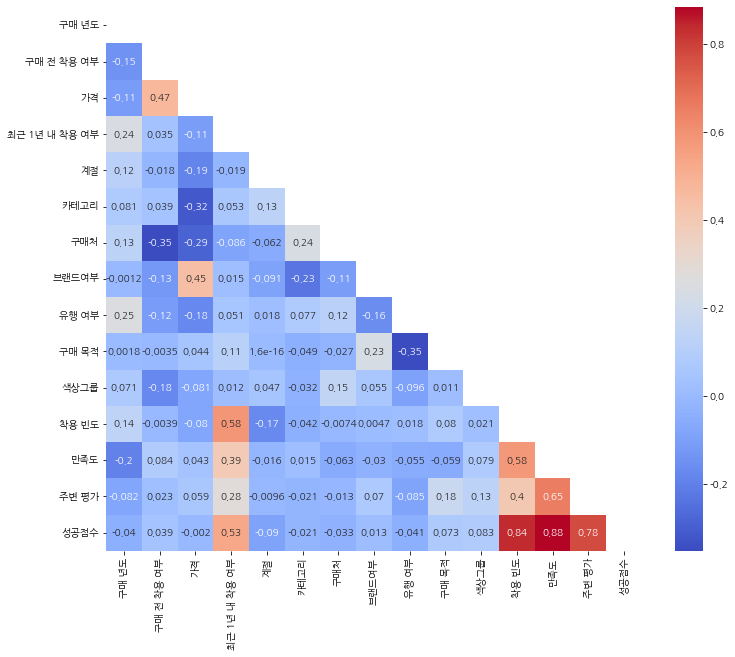

In [23]:
# 전체 상관관계 시각화
mask = np.triu(np.ones_like(cor))
plt.figure(figsize=(12,10)) #그래프 사이즈 조절
sns.heatmap(cor, cmap="coolwarm", annot = True, mask=mask)

In [24]:
# 가격 범주 나누기
df["가격_bin"] = pd.cut(df["가격"], bins=5, labels=['1-4','4-8','8-12','12-16','16-20'])
df.head(10)

,제품명,계절,구매 년도,카테고리,구매처,브랜드여부,구매 전 착용 여부,색상,가격,유행 여부,구매 목적,최근 1년 내 착용 여부,착용 빈도,만족도,주변 평가,성공점수,색상그룹,가격_bin
0,배색 가디건 네이비,봄가을,2021,상의,온라인,보세,1,네이비,3,무난,일상,1,5,5,3,4.333333,블루 계열,1-4
1,배색 가디건 하늘,봄가을,2021,상의,오프라인,보세,1,스카이블루,3,무난,일상,1,3,4,4,3.666667,블루 계열,1-4
2,줄무늬 티셔츠,봄가을,2014,상의,오프라인,보세,0,네이비,1,무난,일상,1,4,5,4,4.333333,블루 계열,1-4
3,파란색 크롭 셔츠,봄가을,2023,상의,온라인,SPA,0,스카이블루,4,유행,일상,1,4,4,4,4.000000,블루 계열,1-4
4,숏 트렌치 코트,봄가을,2023,겉옷,오프라인,브랜드,1,베이지,16,유행,일상,1,3,4,3,3.333333,브라운 계열,12-16
5,부츠컷 청바지_loc,봄가을,2023,하의,오프라인,보세,1,데님,4,유행,일상,1,5,5,5,5.000000,블루 계열,1-4
6,연청 청바지,봄가을,2023,하의,오프라인,보세,1,데님,5,유행,일상,1,4,4,3,3.666667,블루 계열,4-8
7,진청 청바지_zara,봄가을,2021,하의,오프라인,SPA,1,데님,5,무난,일상,1,5,5,5,5.000000,블루 계열,4-8
8,화이트 바지,봄가을,2022,하의,온라인,보세,0,아이보리,3,무난,일상,1,3,3,4,3.333333,화이트 계열,1-4
9,진그레이 바지,봄가을,2022,하의,온라인,보세,0,차콜,3,무난,일상,1,3,3,3,3.000000,그레이 계열,1-4


In [25]:
# 가격 범주 나누기 qcut
df["가격_q_bin"] = pd.qcut(df["가격"], q=4, labels=['매우 낮은 가격', '낮은 가격', '중간 가격', '높은 가격'])
df

,제품명,계절,구매 년도,카테고리,구매처,브랜드여부,구매 전 착용 여부,색상,가격,유행 여부,구매 목적,최근 1년 내 착용 여부,착용 빈도,만족도,주변 평가,성공점수,색상그룹,가격_bin,가격_q_bin
0,배색 가디건 네이비,봄가을,2021,상의,온라인,보세,1,네이비,3,무난,일상,1,5,5,3,4.333333,블루 계열,1-4,매우 낮은 가격
1,배색 가디건 하늘,봄가을,2021,상의,오프라인,보세,1,스카이블루,3,무난,일상,1,3,4,4,3.666667,블루 계열,1-4,매우 낮은 가격
2,줄무늬 티셔츠,봄가을,2014,상의,오프라인,보세,0,네이비,1,무난,일상,1,4,5,4,4.333333,블루 계열,1-4,매우 낮은 가격
3,파란색 크롭 셔츠,봄가을,2023,상의,온라인,SPA,0,스카이블루,4,유행,일상,1,4,4,4,4.000000,블루 계열,1-4,낮은 가격
4,숏 트렌치 코트,봄가을,2023,겉옷,오프라인,브랜드,1,베이지,16,유행,일상,1,3,4,3,3.333333,브라운 계열,12-16,높은 가격
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,여름 블랙 팬츠_에이블리,여름,2021,하의,온라인,보세,0,블랙,2,무난,출근,1,4,4,4,4.000000,블랙 계열,1-4,매우 낮은 가격
146,잔스트라이프 셔츠,봄가을,2019,상의,오프라인,브랜드,0,브라운,8,무난,출근,1,4,5,5,4.666667,브라운 계열,4-8,높은 가격
147,브라운 뷔스티에 원피스,봄가을,2020,원피스,오프라인,보세,1,브라운,5,유행,일상,0,1,1,1,1.000000,브라운 계열,4-8,중간 가격
148,여름 연청바지,여름,2019,하의,온라인,보세,0,데님,3,무난,일상,0,1,3,3,2.333333,블루 계열,1-4,매우 낮은 가격


<AxesSubplot:xlabel='가격_bin', ylabel='count'>

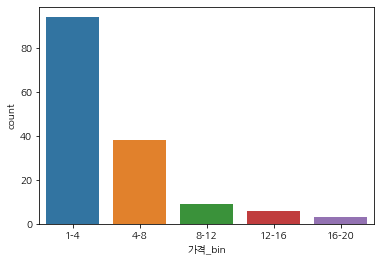

In [26]:
sns.countplot(data=df, x="가격_bin")

<AxesSubplot:xlabel='가격_q_bin', ylabel='count'>

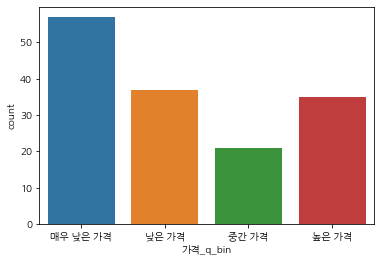

In [27]:
sns.countplot(data=df, x="가격_q_bin")

In [28]:
# df.to_csv('my_closet_color_group', index=False)

# 시각화

<AxesSubplot:xlabel='가격', ylabel='성공점수'>

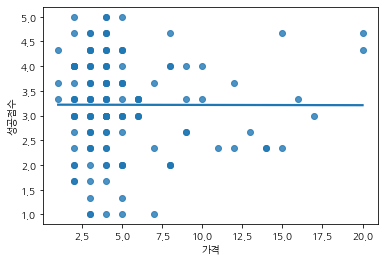

In [29]:
sns.regplot(data=df, x='가격', y='성공점수', ci=None)

<AxesSubplot:xlabel='최근 1년 내 착용 여부', ylabel='성공점수'>

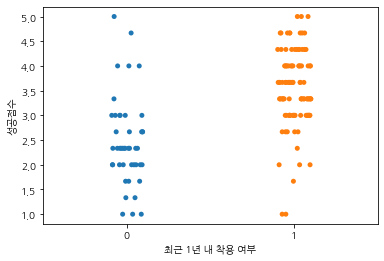

In [30]:
sns.stripplot(data=df, x='최근 1년 내 착용 여부', y='성공점수')

<AxesSubplot:xlabel='가격', ylabel='성공점수'>

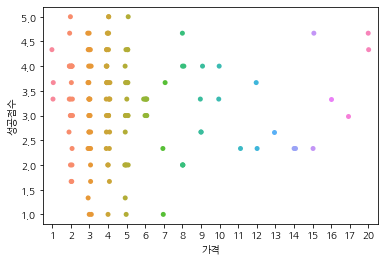

In [31]:
sns.stripplot(data=df, x="가격", y="성공점수")

In [32]:
purpose_score = df.groupby(['구매 목적'])["성공점수"].mean().to_frame().sort_values(by="성공점수")
purpose_price = df.groupby(['구매 목적'])["가격"].mean().to_frame().sort_values(by="가격")

<AxesSubplot:xlabel='구매 목적', ylabel='성공점수'>

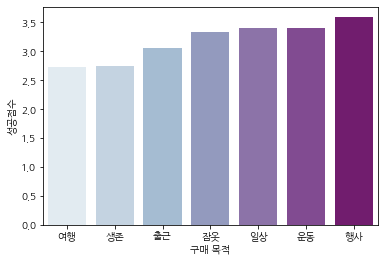

In [33]:
sns.barplot(data=purpose_score, x=purpose_score.index, y='성공점수', palette="BuPu")

<AxesSubplot:xlabel='구매 목적', ylabel='가격'>

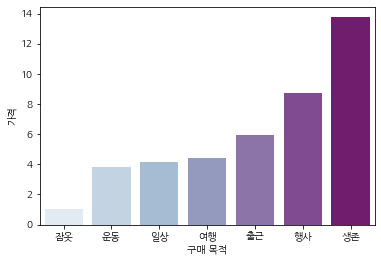

In [34]:
sns.barplot(data=purpose_price, x=purpose_price.index, y='가격', palette="BuPu")

<AxesSubplot:xlabel='가격_bin', ylabel='성공점수'>

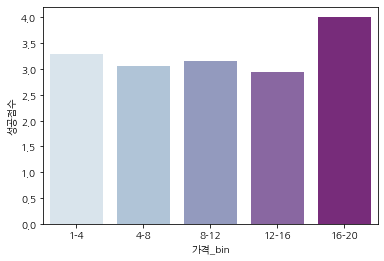

In [35]:
sns.barplot(data=df, x='가격_bin', y='성공점수', palette="BuPu", ci=None)

<AxesSubplot:xlabel='가격_q_bin', ylabel='성공점수'>

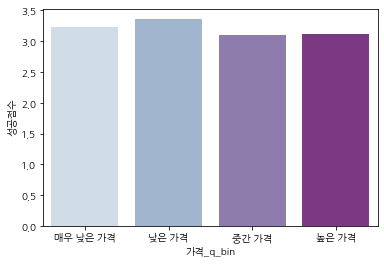

In [36]:
sns.barplot(data=df, x='가격_q_bin', y='성공점수', palette="BuPu", ci=None)

<AxesSubplot:xlabel='카테고리', ylabel='성공점수'>

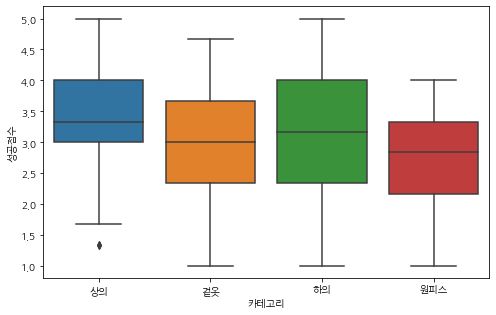

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='카테고리', y='성공점수')

<AxesSubplot:xlabel='구매 목적', ylabel='성공점수'>

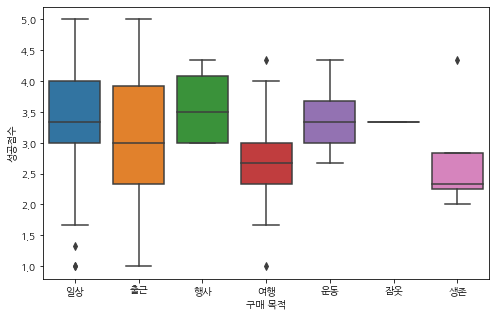

In [38]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='구매 목적', y='성공점수')

<AxesSubplot:xlabel='색상그룹', ylabel='성공점수'>

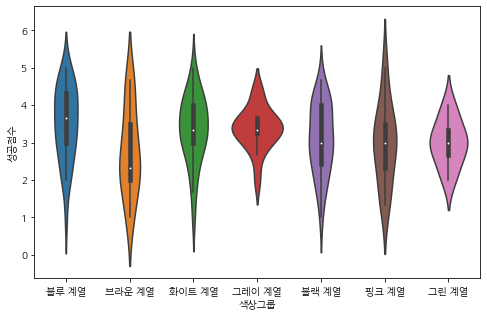

In [45]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='색상그룹', y='성공점수')